In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
 # Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e2c0addb2379ad604f19c90b9428be2


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | kavieng
Processing Record 4 of Set 1 | cukai
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | havoysund
Processing Record 8 of Set 1 | uray
Processing Record 9 of Set 1 | dalvik
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | lorengau
Processing Record 12 of Set 1 | watsa
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | puerto escondido
Processing Record 20 of Set 1 | buala
Processing Record 21 of Set 1 | souillac
Processing Record 22 of Set 1 | rawson
Processing Record 23 of Set 1 | marienburg

City not found. Skipping...
Processing Record 37 of Set 4 | port elizabeth
Processing Record 38 of Set 4 | tchibanga
Processing Record 39 of Set 4 | saleaula
City not found. Skipping...
Processing Record 40 of Set 4 | flinders
Processing Record 41 of Set 4 | ribeira grande
Processing Record 42 of Set 4 | pacific grove
Processing Record 43 of Set 4 | nago
Processing Record 44 of Set 4 | upernavik
Processing Record 45 of Set 4 | byumba
Processing Record 46 of Set 4 | bandarbeyla
Processing Record 47 of Set 4 | olinda
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | fukue
Processing Record 50 of Set 4 | nanortalik
Processing Record 1 of Set 5 | ahipara
Processing Record 2 of Set 5 | saint-denis
Processing Record 3 of Set 5 | wittenberge
Processing Record 4 of Set 5 | joigny
Processing Record 5 of Set 5 | atar
Processing Record 6 of Set 5 | klaksvik
Processing Record 7 of Set 5 | presidente franco
Processing Record 8 of Set 5 | yerofey pavlovich
Processing Recor

Processing Record 28 of Set 8 | ararat
Processing Record 29 of Set 8 | kuusamo
Processing Record 30 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 31 of Set 8 | platanos
Processing Record 32 of Set 8 | bilibino
Processing Record 33 of Set 8 | lazaro cardenas
Processing Record 34 of Set 8 | hue
Processing Record 35 of Set 8 | marzuq
Processing Record 36 of Set 8 | faanui
Processing Record 37 of Set 8 | ranir bazar
Processing Record 38 of Set 8 | huarmey
Processing Record 39 of Set 8 | mandan
Processing Record 40 of Set 8 | victoria
Processing Record 41 of Set 8 | merauke
Processing Record 42 of Set 8 | portmore
Processing Record 43 of Set 8 | lompoc
Processing Record 44 of Set 8 | ulladulla
Processing Record 45 of Set 8 | manitouwadge
Processing Record 46 of Set 8 | karamea
City not found. Skipping...
Processing Record 47 of Set 8 | sawakin
Processing Record 48 of Set 8 | la seyne-sur-mer
Processing Record 49 of Set 8 | muyezerskiy
Processing Record 50 of Set 8 | ener

Processing Record 14 of Set 12 | cherskiy
Processing Record 15 of Set 12 | mazagao
Processing Record 16 of Set 12 | chifeng
Processing Record 17 of Set 12 | pueblo nuevo
Processing Record 18 of Set 12 | goderich
Processing Record 19 of Set 12 | dimapur
Processing Record 20 of Set 12 | vokhma
Processing Record 21 of Set 12 | windsor
Processing Record 22 of Set 12 | cadiz
Processing Record 23 of Set 12 | primo tapia
Processing Record 24 of Set 12 | beringovskiy
Processing Record 25 of Set 12 | wanning
Processing Record 26 of Set 12 | peniche
Processing Record 27 of Set 12 | babanusah
City not found. Skipping...
Processing Record 28 of Set 12 | bandar-e lengeh
Processing Record 29 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 30 of Set 12 | sokolka
Processing Record 31 of Set 12 | rungata
City not found. Skipping...
Processing Record 32 of Set 12 | hopelchen
Processing Record 33 of Set 12 | general pico
Processing Record 34 of Set 12 | berdigestyakh
Processing Rec

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,62.49,69,82,1.83,RU,2021-07-23 18:53:00
1,Arraial Do Cabo,-22.9661,-42.0278,76.96,60,0,16.11,BR,2021-07-23 18:56:09
2,Kavieng,-2.5744,150.7967,81.97,79,19,13.18,PG,2021-07-23 18:56:10
3,Cukai,4.2500,103.4167,80.74,84,100,2.13,MY,2021-07-23 18:56:11
4,Punta Arenas,-53.1500,-70.9167,41.11,75,20,20.71,CL,2021-07-23 18:51:44
5,Bredasdorp,-34.5322,20.0403,51.12,71,0,10.36,ZA,2021-07-23 18:53:47
6,Havoysund,70.9963,24.6622,46.63,87,100,27.34,NO,2021-07-23 18:56:13
7,Uray,60.1247,64.7758,54.82,82,100,3.94,RU,2021-07-23 18:52:08
8,Dalvik,65.9702,-18.5286,67.93,88,100,4.85,IS,2021-07-23 18:56:15
9,Albany,42.6001,-73.9662,79.27,60,77,6.51,US,2021-07-23 18:55:22


In [11]:
#Reorder the columns
new_column_order = ["City", "Country","Date", "Lat","Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2021-07-23 18:53:00,59.7035,30.7861,62.49,69,82,1.83
1,Arraial Do Cabo,BR,2021-07-23 18:56:09,-22.9661,-42.0278,76.96,60,0,16.11
2,Kavieng,PG,2021-07-23 18:56:10,-2.5744,150.7967,81.97,79,19,13.18
3,Cukai,MY,2021-07-23 18:56:11,4.2500,103.4167,80.74,84,100,2.13
4,Punta Arenas,CL,2021-07-23 18:51:44,-53.1500,-70.9167,41.11,75,20,20.71


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting. 6.3.1
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

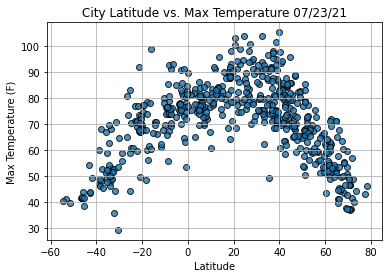

In [14]:
## 6.3.1 Create a scatter plot for the latitude vs. maximum temperature and 
## run the cell.

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


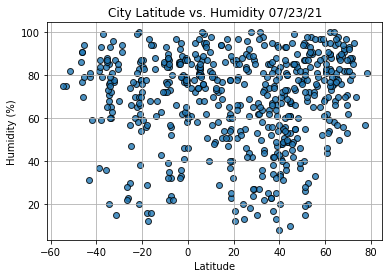

In [15]:
## 6.3.1 Build the scatter plots for latitude vs. humidity. 
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

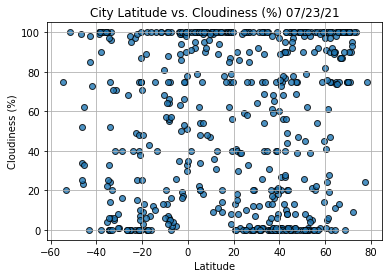

In [16]:
## 6.3.1 Build the scatter plots for latitude vs. cloudiness. 
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

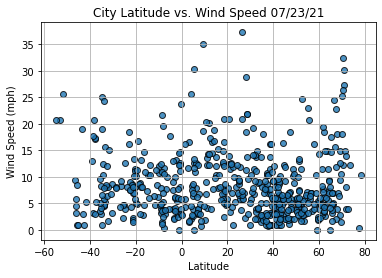

In [17]:
##  6.3.1 Build the scatter plots for latitude vs. wind speed. 
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
## 6.4.2 Create a function, "plot_linear_regression", and add the 
## four parameters inside the parentheses.

## Create a function to perform linear regression on the weather data
## and plot a regression line and the equation with the data.

# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
       
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
   
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
## 6.4.2 To create a new DataFrame from a current DataFrame, we can use the 
## loc method on the current DataFrame. The loc method accesses a group 
## of rows and columns in the current DataFrame by an index, labels, or 
## a Boolean array. The syntax to get a specific row from a current 
## DataFrame is row = df.loc[row_index].

index13 = city_data_df.loc[13]  
index13

City                  Tuktoyaktuk
Country                        CA
Date          2021-07-23 18:54:36
Lat                       69.4541
Lng                     -133.0374
Max Temp                     53.6
Humidity                       66
Cloudiness                     75
Wind Speed                  14.97
Name: 13, dtype: object

In [21]:
## 6.4.2 We can also filter a DataFrame based on a value of a row. For instance, 
## if we wanted to get all Northern Hemisphere latitudes, for latitudes 
## greater than or equal to 0, we can filter the city_data_df DataFrame using 
## the code city_data_df["Lat"] >= 0. Executing this code will return either 
## "True" or "False" for all the rows that meet these criteria.

city_data_df["Lat"] >= 0


0       True
1      False
2      False
3       True
4      False
       ...  
556     True
557     True
558    False
559    False
560     True
Name: Lat, Length: 561, dtype: bool

In [22]:
## 6.4.2 If we want to return a DataFrame with all data fitting the criteria, 
## for latitudes greater than or equal to 0, we can use the loc method on 
##the city_data_df DataFrame. Inside the brackets, we would add the conditional 
## filter city_data_df["Lat"] >= 0 so that our statement would appear as:

city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2021-07-23 18:53:00,59.7035,30.7861,62.49,69,82,1.83
3,Cukai,MY,2021-07-23 18:56:11,4.2500,103.4167,80.74,84,100,2.13
6,Havoysund,NO,2021-07-23 18:56:13,70.9963,24.6622,46.63,87,100,27.34
7,Uray,RU,2021-07-23 18:52:08,60.1247,64.7758,54.82,82,100,3.94
8,Dalvik,IS,2021-07-23 18:56:15,65.9702,-18.5286,67.93,88,100,4.85
...,...,...,...,...,...,...,...,...,...
553,Chabahar,IR,2021-07-23 19:05:38,25.2919,60.6430,85.98,83,0,9.46
555,Masuda,JP,2021-07-23 19:05:40,34.6667,131.8500,77.34,79,100,2.82
556,Teya,RU,2021-07-23 19:05:41,60.3778,92.6267,59.49,85,1,2.19
557,Manavgat,TR,2021-07-23 19:05:42,36.7867,31.4431,86.83,66,13,1.77


In [23]:
## 6.4.2 Get just the first 5 rows not counting the row of column headings
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2021-07-23 18:53:00,59.7035,30.7861,62.49,69,82,1.83
3,Cukai,MY,2021-07-23 18:56:11,4.2500,103.4167,80.74,84,100,2.13
6,Havoysund,NO,2021-07-23 18:56:13,70.9963,24.6622,46.63,87,100,27.34
7,Uray,RU,2021-07-23 18:52:08,60.1247,64.7758,54.82,82,100,3.94
8,Dalvik,IS,2021-07-23 18:56:15,65.9702,-18.5286,67.93,88,100,4.85


In [24]:
## 6.4.2
# Create Northern and Southern Hemisphere DataFrames. 
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

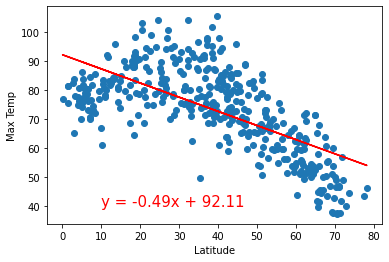

In [44]:
## 6.4.2 To generate the linear regression on the maximum temperature for 
## the Northern Hemisphere, we'll need x and y values. Set the x values 
## equal to the latitude column and the y values equal to the maximum 
## temperature column from the northern_hemi_df DataFrame.

## Call the plot_linear_regression function with the x and y values, 
## and edit the title, y_label, and text_coordinates for the maximum 
## temperature scatter plot. 
## Add the code to a new cell and run it to generate the linear regression 
## and plot the data.

## If the equation for the regression line doesn't show up on your graph, 
## you can change the text_coordinates until you see the equation.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for Maximum Temperature', 'Max Temp',(10,40))


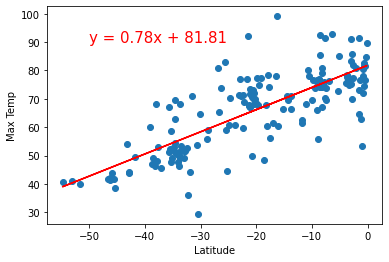

In [32]:
## 6.4.2 To generate the linear regression on the maximum temperature for 
## the Southern Hemisphere,## reuse the code for the Northern Hemisphere 
## and replace the northern_hemi_df DataFrame with the 
## southern_hemi_df DataFrame to get the x- and y-values.
## Call the plot_linear_regression function with the x- and y-values, 
## and edit the title, y_label, and text_coordinates for the 
##maximum temperature scatter plot. Add the code to a new cell 
## and run it to generate the linear regression and plot the data.

## The correlation between the latitude and the maximum temperature 
## is strong to very strong because the r-value is less than –0.7 
##for the Northern Hemisphere and greater than 0.7 for the Southern 
## Hemisphere, as shown by the plots here. This means that as we 
## approach the equator, 0° latitude, the temperatures become warmer. 
## And when we are further from the equator the temperatures become 
## cooler. Check the r-values for your plots. 

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                       'for Maximum Temperature', 'Max Temp',(-50,90))

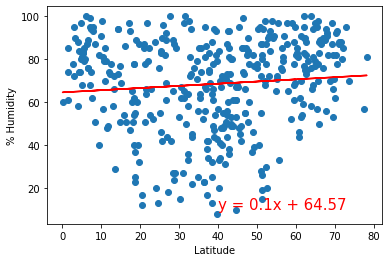

In [33]:
## 6.4.3 To perform the linear regression on the percent humidity for the 
## Northern Hemisphere, set the x-value equal to the latitude column 
## and y-value equal to the Humidity column from the northern_hemi_df 
## DataFrame.

## Call the plot_linear_regression function with the x- and y-values, 
## and edit the title, y_label, and text_coordinates for the percent 
## humidity scatter plot.

## Add the code to a new cell and run it to generate the linear regression 
## and plot the data.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for % Humidity', '% Humidity',(40,10))

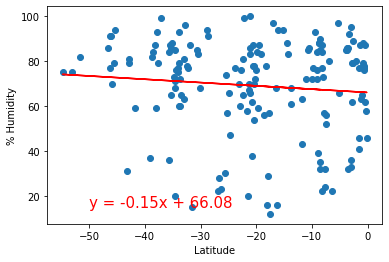

In [34]:
## 6.4.3 For our linear regression line and plot of the percent humidity and 
## latitudes for the Southern Hemisphere, set the x-value equal to the 
## latitude column and y-value equal to the humidity column from the 
## southern_hemi_df DataFrame.

## Call the plot_linear_regression function, with the x-and y-values, 
## and edit the title, y_label, and text_coordinates for the percent 
## humidity scatter plot.

##Add the code to a new cell and run it to generate the linear regression 
##and plot the data.
## The correlation between the latitude and percent humidity 
## is very low because the r-value is less than 0.04 for the Northern and 
## Southern Hemispheres for the plots shown here. 
## This means that percent humidity is unpredictable due to changing weather
## patterns that can increase or decrease percent humidity.  

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                       'for % Humidity', '% Humidity',(-50,15))

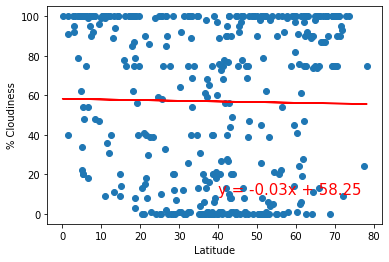

In [35]:
## 6.4.4 Skill Drill 1 

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for % Cloudiness', '% Cloudiness',(40,10))

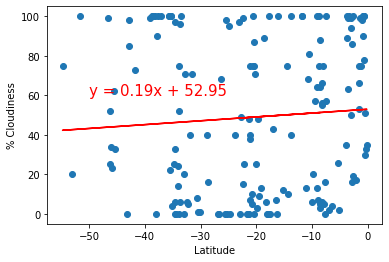

In [36]:
## 6.4.4 Now we'll create the linear regression line and plot for percent 
## cloudiness in the Southern Hemisphere.

# Generate the x-value equal to the latitude column and the y-value 
## equal to the cloudiness column from the southern_hemi_df DataFrame. 
## Call the plot_linear_regression function. Be sure to edit the title, 
## y_label, and text_coordinates for the percent cloudiness scatter plot.

## Add the code to a new cell and run it to generate the linear regression 
## and plot the data.
## The correlation between the latitude and percent cloudiness is very low 
## because the r-value is less than –0.09 for the Northern Hemisphere and 
## less than –0.02 for the Southern Hemisphere for the plots shown here. 
## This means that cloudiness is unpredictable due to changing weather 
## patterns that can increase or decrease percent cloudiness. 

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                       'for % Cloudiness', '% Cloudiness',(-50,60))

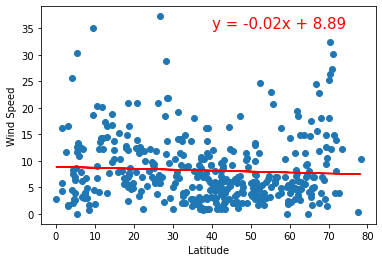

In [37]:
## 6.4.5 Perform Linear Regression on the Wind Speed for the Northern 
## Hemisphere
## Call the plot_linear_regression function, with the x-value equal to 
## the Latitude column and the y-value equal to the Wind Speed column 
##from the northern_hemi_df DataFrame. Edit the title, y_label, and 
## text_coordinates for the wind speed scatter plot.

##Add the code to a new cell and run it to generate the linear regression 
## and plot the data.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for Wind Speed', 'Wind Speed',(40,35))

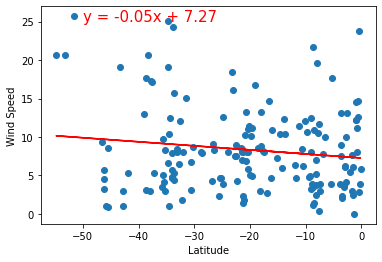

In [42]:
## 6.4.5 Perform Linear Regression on the Wind Speed for the 
## Southern Hemisphere.
## Finally, let's call the plot_linear_regression function, with the 
## x-value equal to the latitude column and the y-value equal to 
## wind speed column from the southern_hemi_df DataFrame. 
## Edit the title, y_label, and text_coordinates for the wind speed 
## scatter plot.

## Add the code to a new cell and run it to generate the linear regression 
##and plot the data.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                       'for Wind Speed', 'Wind Speed',(-50,25))
                        

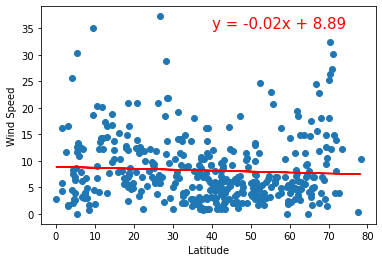

In [39]:
## 6.4.5 Perform Linear Regression on the Wind Speed for the Northern 
## Hemisphere
## Call the plot_linear_regression function, with the x-value equal to 
## the Latitude column and the y-value equal to the Wind Speed column 
## from the northern_hemi_df DataFrame. Edit the title, y_label, 
## and text_coordinates for the wind speed scatter plot.

## Add the code to a new cell and run it to generate the linear regression 
## and plot the data.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for Wind Speed', 'Wind Speed',(40,35))

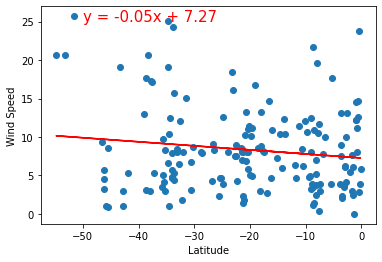

In [43]:
## 6.4.5 Perform Linear Regression on the Wind Speed for the Southern 
##Hemisphere.
## Finally, let's call the plot_linear_regression function, with the 
## x-value equal to the latitude column and the y-value equal to wind 
## speed column from the southern_hemi_df DataFrame. Edit the title, 
## y_label, and text_coordinates for the wind speed scatter plot.

## Add the code to a new cell and run it to generate the linear 
## regression and plot the data.

## The correlation between the latitude and wind speed is very 
##low because the r-value is less  than –0.07 for the Northern Hemisphere 
## and less than –0.3 for the Southern Hemisphere for the plots shown here. 
##This means that wind speed is unpredictable due to changing weather 
## patterns that can increase or decrease wind speed.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-50,25))